In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from mixtures import UnivariateMixture, BivariateMixture, PomegranateUnivariateMixture
import pomegranate as pmg

# Generate univariate sample

In [3]:
mu = [1., 2.]
sigma = 3.
weights = [.1, .9]
generating_model = PomegranateUnivariateMixture.from_parameters(mu, sigma, weights=weights)

Means: 1.00 :: 2.00
Stds: 1.73 :: 1.73
Weights: 0.10 :: 0.90
lnL: -2498.24

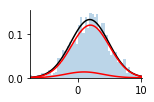

In [4]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
generating_model.plot(ax=ax, log=True, pdf_color='k', component_color='r')
generating_model

In [5]:
N = 5000
multisample = generating_model.multi_sample(N, num_neighbors=10)
sample = multisample[:, 0].reshape(-1, 1)

# Fit univariate sample with scipy

In [6]:
univariate_model = UnivariateMixture.from_sample(sample, n=2, 
                                                 max_iter=5000, tol=1e-7, 
                                                 n_init=10, covariance_type='diag')

Means: 2.92 :: 0.60
Stds: 1.65 :: 1.67
Weights: 0.56 :: 0.44
lnL: -12555.32

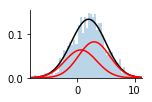

In [7]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
univariate_model.plot(ax=ax, log=True)
univariate_model

# Fit univariate sample with pomegranate

In [8]:
pmg_model = PomegranateUnivariateMixture.from_sample(sample, n=2, max_iter=1e8, stop_threshold=0.0001, n_init=100)

Means: 0.66 :: 2.87
Stds: 1.67 :: 1.66
Weights: 0.44 :: 0.56
lnL: -12555.30

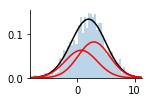

In [9]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
pmg_model.plot(ax=ax, log=True)
pmg_model

# Fit multivariate sample

In [10]:
generating_model

Means: 1.00 :: 2.00
Stds: 1.73 :: 1.73
Weights: 0.10 :: 0.90
lnL: -2498.24

In [11]:
bivariate_model = BivariateMixture.from_sample(multisample, n=2, 
                            max_iter=5000, tol=1e-8, 
                            n_init=10, covariance_type='diag')

In [12]:
bivariate_model

Means: 0.88 :: 2.48
Stds: 1.71 :: 1.69
Weights: 0.36 :: 0.64
lnL: -39183.33

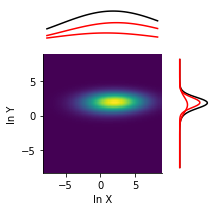

In [13]:
fig = bivariate_model.plot()